In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     966.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):           5.26e-76
Time:                        20:21:43   Log-Likelihood:                -293.45
No. Observations:                 100   AIC:                             596.9
Df Residuals:                      95   BIC:                             609.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4767      3.800      1.967      0.0

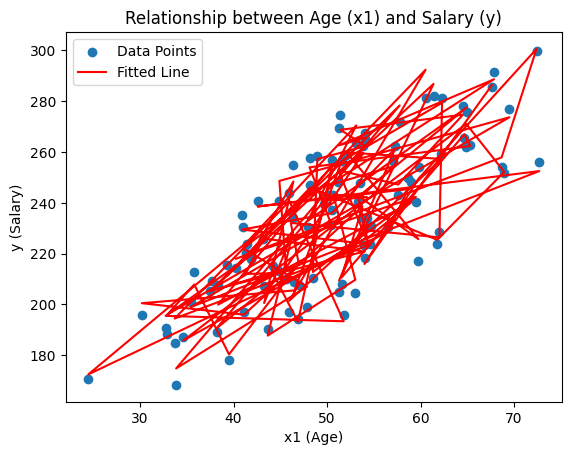

In [14]:
np.random.seed(0)

# Age
x1 = np.random.normal(50, 10, 100) 

# Education Level
x2 = np.random.normal(30, 5, 100) 

# Years of experience
x3 = np.random.normal(10, 3, 100)

# Gender (0 = Female, 1 = Male)
x4 = np.random.choice([0, 1], 100) 

# Outcome variable with some influence from x1, x2, and x3
# My dependent variable is Salary
y = 2*x1 + 3*x2 + 4*x3 + 5*x4 + np.random.normal(0, 5, 100) 

# Create a DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'y': y})

# Perform ANCOVA
model = ols('y ~ x1 + x2 + x3 + C(x4)', data=df).fit()

# Output the summary of the model
print(model.summary())

# Plot the relationship between one of the predictors and the outcome
plt.scatter(df['x1'], df['y'], label='Data Points')
plt.plot(df['x1'], model.fittedvalues, color='red', label='Fitted Line')
plt.xlabel('x1 (Age)')
plt.ylabel('y (Salary)')
plt.title('Relationship between Age (x1) and Salary (y)')
plt.legend()
plt.show()